In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

In [2]:
data=pd.read_csv("Downloads/Car_Price_Prediction.csv")

In [3]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
data.shape

(8128, 13)

In [6]:
data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   object 
 9   engine         6717 non-null   object 
 10  max_power      6717 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 734.7+ KB


# Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

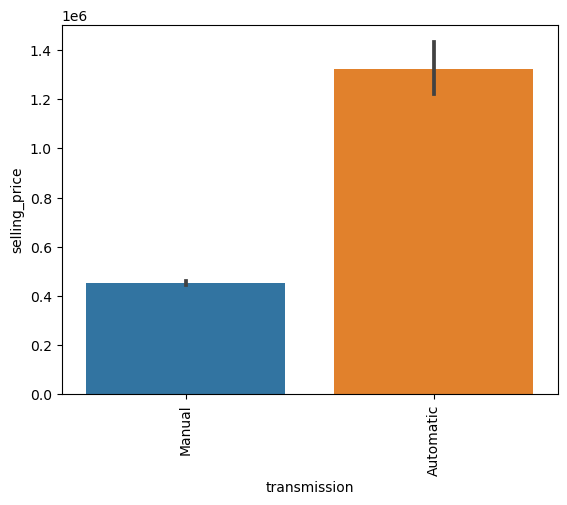

In [13]:
sns.barplot(x=data["transmission"],y=data["selling_price"])
plt.xticks(rotation = 90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

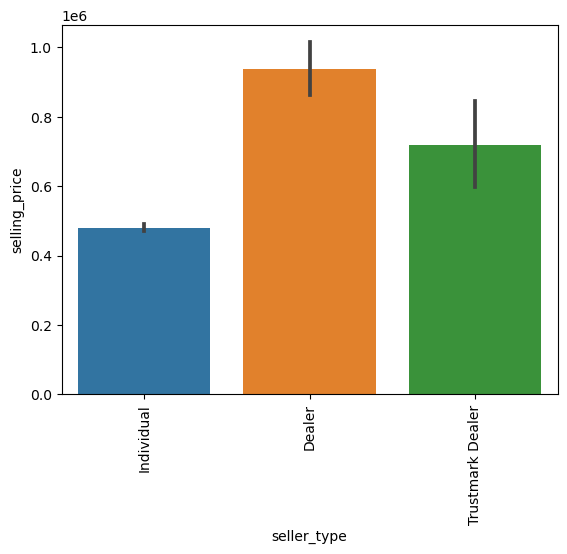

In [14]:
sns.barplot(x=data["seller_type"],y=data["selling_price"])
plt.xticks(rotation = 90)
plt.show

<Axes: xlabel='owner'>

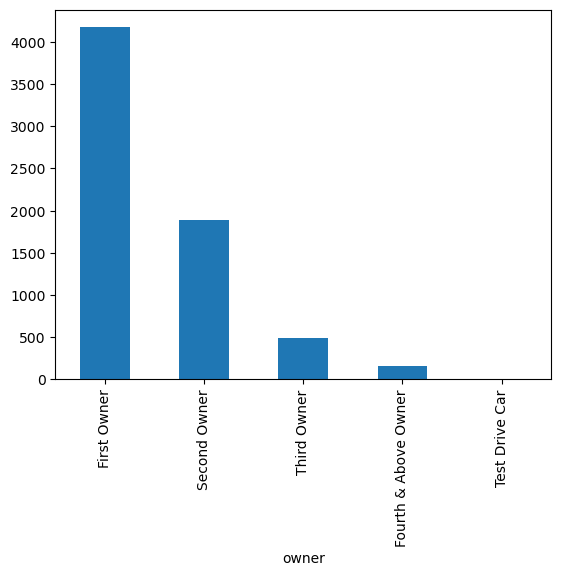

In [15]:
data["owner"].value_counts().plot(kind="bar")

<function matplotlib.pyplot.show(close=None, block=None)>

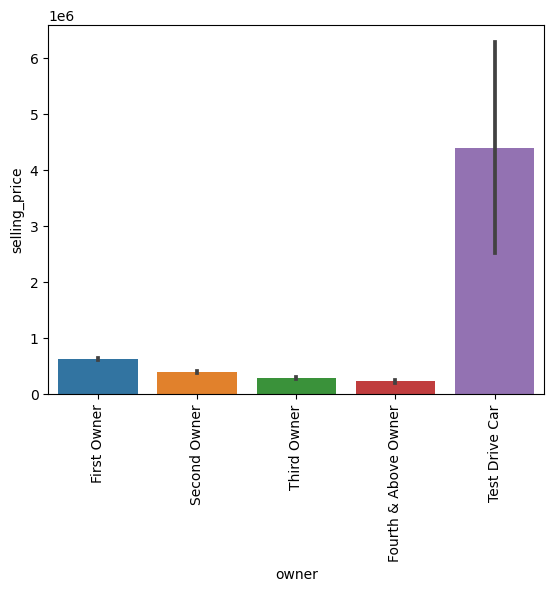

In [16]:
sns.barplot(x=data["owner"],y=data["selling_price"])
plt.xticks(rotation = 90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

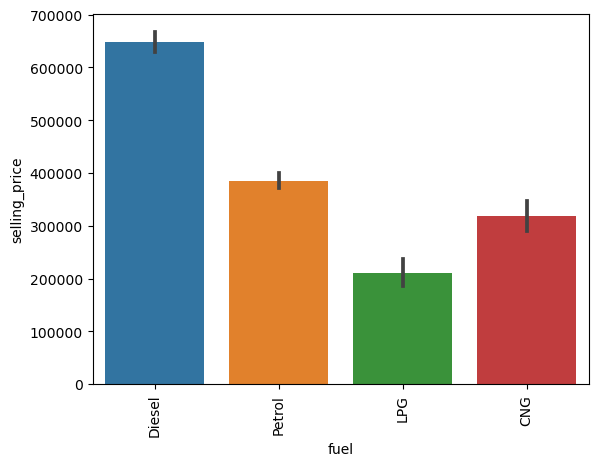

In [17]:
sns.barplot(x=data["fuel"],y=data["selling_price"])
plt.xticks(rotation = 90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

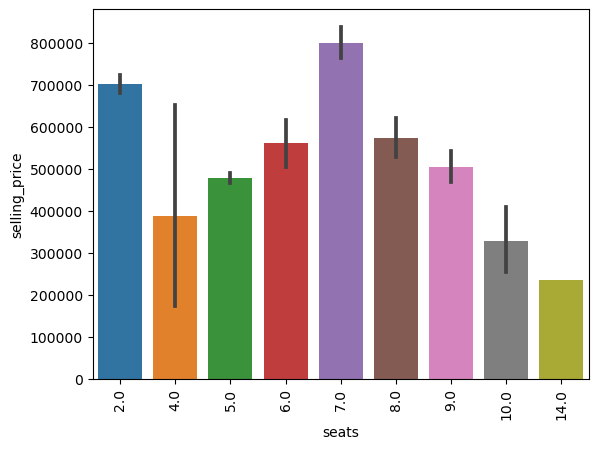

In [18]:
sns.barplot(x=data["seats"],y=data["selling_price"])
plt.xticks(rotation = 90)
plt.show

In [19]:
data['brand'] = data['name'].str.split(' ').str[0]
print(data['brand'])

0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
8121     Maruti
8122    Hyundai
8123    Hyundai
8124    Hyundai
8125     Maruti
Name: brand, Length: 6717, dtype: object


In [20]:
data['brand'].value_counts()

brand
Maruti           2089
Hyundai          1214
Mahindra          709
Tata              633
Honda             361
Ford              353
Toyota            324
Chevrolet         216
Renault           206
Volkswagen        173
Nissan             73
Skoda              69
Datsun             57
Mercedes-Benz      46
BMW                45
Fiat               39
Audi               33
Jeep               22
Mitsubishi         11
Volvo               9
Jaguar              8
Isuzu               4
Ambassador          4
Force               4
Land                3
Kia                 3
Daewoo              3
MG                  3
Ashok               1
Lexus               1
Opel                1
Name: count, dtype: int64

In [21]:
data['name'].value_counts()

name
Maruti Swift Dzire VDI                          118
Maruti Alto 800 LXI                              76
Maruti Alto LXi                                  69
Maruti Swift VDI                                 60
Maruti Alto K10 VXI                              47
                                               ... 
BMW X7 xDrive 30d DPE                             1
Skoda Superb Elegance 1.8 TSI AT                  1
Skoda Fabia 1.2 TDI Ambition Plus                 1
Skoda Rapid 1.6 MPI AT Ambition BSIV              1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV      1
Name: count, Length: 1982, dtype: int64

In [22]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti


<function matplotlib.pyplot.show(close=None, block=None)>

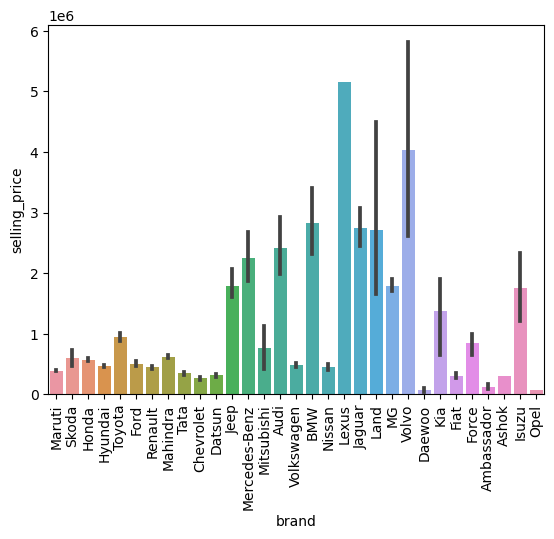

In [23]:
sns.barplot(x=data['brand'], y=data['selling_price'])
plt.xticks(rotation = 90)
plt.show

In [24]:
data['engine'] = data['engine'].str.replace(' CC', '')


In [25]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248,74 bhp,190Nm@ 2000rpm,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti


In [26]:
data.drop(columns=['mileage','torque','max_power',"name"],inplace=True)

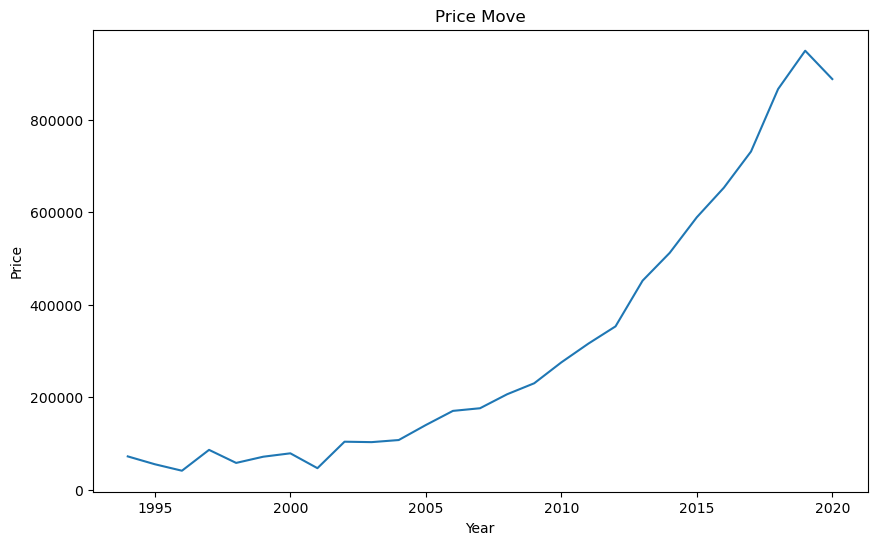

In [27]:
df_price_move = data.groupby(['year'])[['selling_price']].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_price_move['year'], df_price_move['selling_price'])
plt.title('Price Move')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [28]:
data.groupby('seats')['transmission'].value_counts()

seats  transmission
2.0    Manual             2
4.0    Manual           112
       Automatic         12
5.0    Manual          4797
       Automatic        457
6.0    Manual            57
7.0    Manual           874
       Automatic         92
8.0    Manual           207
       Automatic         14
9.0    Manual            74
10.0   Manual            18
14.0   Manual             1
Name: count, dtype: int64

In [29]:
data['brand'].value_counts()

brand
Maruti           2089
Hyundai          1214
Mahindra          709
Tata              633
Honda             361
Ford              353
Toyota            324
Chevrolet         216
Renault           206
Volkswagen        173
Nissan             73
Skoda              69
Datsun             57
Mercedes-Benz      46
BMW                45
Fiat               39
Audi               33
Jeep               22
Mitsubishi         11
Volvo               9
Jaguar              8
Isuzu               4
Ambassador          4
Force               4
Land                3
Kia                 3
Daewoo              3
MG                  3
Ashok               1
Lexus               1
Opel                1
Name: count, dtype: int64

In [30]:
data['seats'].value_counts()

seats
5.0     5254
7.0      966
8.0      221
4.0      124
9.0       74
6.0       57
10.0      18
2.0        2
14.0       1
Name: count, dtype: int64

In [31]:
fuel_map = {'Petrol': 0, 'Diesel': 1, 'CNG': 2, 'LPG': 3}
data['fuel'] = data['fuel'].map(fuel_map)

In [32]:
selling_type_map = {'Dealer':0,'Individual':1, 'Trustmark Dealer': 2}
data['seller_type'] = data['seller_type'].map(selling_type_map)

In [33]:
transmission_map = {'Manual':0,'Automatic':1}
data['transmission'] = data['transmission'].map(transmission_map)

In [34]:
owner_map={'First Owner':0 ,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}
data['owner']=data['owner'].map(owner_map)

In [35]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,seats,brand
0,2014,450000,145500,1,1,0,0,1248,5.0,Maruti
1,2014,370000,120000,1,1,0,1,1498,5.0,Skoda
2,2006,158000,140000,0,1,0,2,1497,5.0,Honda
3,2010,225000,127000,1,1,0,0,1396,5.0,Hyundai
4,2007,130000,120000,0,1,0,0,1298,5.0,Maruti


In [36]:
brand_map = {'Maruti':0,'Mahindra':1,'Hyundai':2,'Tata':3,'Honda':4,'Ford':5,'Toyota':6,'Chevrolet':7,'Renault':8
,'Volkswagen': 9,'Nissan':10,'Skoda':11,'Datsun':12,'Mercedes-Benz':13,'BMW':14,'Fiat':15,'Audi':16,'Jeep':17,'Mitsubishi':18,
'Volvo':4,'Jaguar':2,'Isuzu':19,'Ambassador':20,'Force':21,'Land':2,'Kia':2,'Daewoo':3,'MG':22,'Ashok':23,'Lexus':6,'Opel':8}
data['brand'] = data['brand'].map(brand_map)

In [37]:
x = data.drop(['selling_price'], axis = 1)
y = data['selling_price']

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

In [39]:
print("x_test",x_test.shape)
print("x_train",x_test.shape)
print("y_test",y_test.shape)
print("y_train",y_train.shape)

x_test (1344, 9)
x_train (1344, 9)
y_test (1344,)
y_train (5373,)


In [42]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

gb_regressor = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.1, random_state=42)

gb_regressor.fit(x_train, y_train)

y_pred = gb_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rscore = r2_score(y_test, y_pred)

print("R-squared:", rscore)

Mean Squared Error: 37035847035.15587
R-squared: 0.8312185377434489
